In [111]:
using LinearAlgebra
using SparseArrays
using Plots
using DifferentialEquations
using BenchmarkTools
using StaticArrays
gr()

Plots.GRBackend()

In [112]:
Nx = 200
Ny = 100
LeftX = 0
LeftY = 0
RightX = 10
RightY = 5
Lx = RightX-LeftX
Ly = RightY-LeftY
hx = (RightX - LeftX)/Nx 
hy = (RightY - LeftY)/Ny 
tStart = 0
tEnd = 4
FT = Float64

Float64

In [113]:
function coeffK(x, y, RightX, RightY)
    result = zeros(size(x))
    line_x = findall(x.<(RightX/2))[end][2]
    line_y = findall(y.<(RightY/2))[end][1]
    result[1:line_y, 1:line_x] .= 0.1
    result[line_y+1:end, 1:line_x] .= 0.4
    result[line_y+1:end, line_x+1:end] .= 0.7
    result[1:line_y, line_x+1:end] .= 1.0
    return result
end

function create2DLFVM(Nx, Ny, hx, hy, coeffFun, LeftX, LeftY, RightX, RightY)
    x_points = [j for j in LeftX:hx:RightX][2:end-1]
    y_points = [i for i in LeftY:hy:RightY][2:end-1]
    x = zeros((Ny-1, Nx-1))
    y = zeros((Ny-1, Nx-1))

    for j in 1:length(y_points)
        x[j, :] = x_points
    end

    for i in 1:length(x_points)
        y[:, i] = y_points
    end

    main_arr = ((1 / (hx * hx)) .* (coeffFun(x .- 0.5 * hx, y, RightX, RightY) .+ coeffFun(x .+ 0.5 * hx, y, RightX, RightY)) .+ (1 / (hy * hy)) .* (coeffFun(x, y .- 0.5 * hy, RightX, RightY) .+ coeffFun(x, y .+ 0.5 * hy, RightX, RightY)))
    main_arr = vec(main_arr')
    k3_arr = -(coeffFun(x, y .+ 0.5 * hy, RightX, RightY)) ./ (hy * hy)
    k3_arr = vec(k3_arr')
    k3_arr = k3_arr[1:(end - Nx + 1)]
    k1_arr = -(coeffFun(x .+ 0.5 * hx, y, RightX, RightY)) ./ (hx * hx)
    k1_arr[:, end] .= 0
    k1_arr = vec(k1_arr')
    k1_arr = k1_arr[1:(end - 1)]
    A = SparseArrays.spdiagm(0 => main_arr, -1 => k1_arr, 1 => k1_arr, (-Nx+1) => k3_arr, (Nx-1) => k3_arr)
    return A
end

@code_warntype create2DLFVM(Nx, Ny, hx, hy, coeffK, LeftX, LeftY, RightX, RightY)
# @code_warntype coeffK(zeros((Ny-1, Nx-1)), zeros((Ny-1, Nx-1)), RightX, RightY)

MethodInstance for create2DLFVM(::Int64, ::Int64, ::Float64, ::Float64, ::typeof(coeffK), ::Int64, ::Int64, ::Int64, ::Int64)
  from create2DLFVM(Nx, Ny, hx, hy, coeffFun, LeftX, LeftY, RightX, RightY) @ Main c:\Users\Admin\Desktop\Pattern-formation-in-sediment-transport-in-rivers\jupyter notebook\wave.ipynb:12
Arguments
  #self#::Core.Const(create2DLFVM)
  Nx::Int64
  Ny::Int64
  hx::Float64
  hy::Float64
  coeffFun::Core.Const(coeffK)
  LeftX::Int64
  LeftY::Int64
  RightX::Int64
  RightY::Int64
Locals
  @_11::Union{Nothing, Tuple{Int64, Int64}}
  @_12::Union{Nothing, Tuple{Int64, Int64}}
  A::SparseMatrixCSC{Float64, Int64}
  k1_arr::Union{Base.ReshapedArray{Float64, 1, Adjoint{Float64, Matrix{Float64}}, Tuple{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64}}}, VecOrMat{Float64}}
  k3_arr::Union{Base.ReshapedArray{Float64, 1, Adjoint{Float64, Matrix{Float64}}, Tuple{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64}}}, VecOrMat{Float64}}
  main_arr::Union{B

::SparseMatrixCSC{Float64, Int64}
1 ─        Core.NewvarNode(:(@_11))
│          Core.NewvarNode(:(A))
│          Core.NewvarNode(:(k1_arr))
│          Core.NewvarNode(:(k3_arr))
│          Core.NewvarNode(:(main_arr))
│   %6   = (LeftX:hx:RightX)::StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}
│   %7   = Base.Generator(Base.identity, %6)::Base.Generator{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, typeof(identity)}
│   %8   = Base.collect(%7)::Vector{Float64}
│   %9   = Base.lastindex(%8)::Int64
│   %

10  = (%9 - 1)::Int64
│   %11  = (2:%10)::Core.PartialStruct(UnitRange{Int64}, Any[Core.Const(2), Int64])
│          (x_points = Base.getindex(%8, %11))
│   %13  = (LeftY:hy:RightY)::StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}
│   %14  = Base.Generator(Base.identity, %13)::Base.Generator{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, typeof(identity)}
│   %15  = Base.collect

(%14)::Vector{Float64}
│   %16  = Base.lastindex(%15)::Int64
│   %17  = (%16 - 1)::Int64
│   %18  = (2:%17)::Core.PartialStruct(UnitRange{Int64}, Any[Core.Const(2), Int64])
│          (y_points = Base.getindex(%15, %18))
│   %20  = (Ny - 1)::Int64
│   %21  = (Nx - 1)::Int64
│   %22  = Core.tuple(%20, %21)::Tuple{Int64, Int64}
│          (x = Main.zeros(%22))
│   %24  = (Ny - 1)::Int64
│   %25  = (Nx - 1)::Int64
│   %26  = Core.tuple(%24, %25)::Tuple{Int64, Int64}
│          (y = Main.zeros(%26))
│   %28  = Main.

length(y_points)::Int64
│   %29  = (1:%28)::Core.PartialStruct(UnitRange{Int64}, Any[Core.Const(1), Int64])
│          (@_12 = Base.iterate(%29))
│   %31  = (@_12 === nothing)::Bool
│   %32  = Base.not_int(%31)::Bool
└──        goto #4 if not %32
2 ┄ 

%34  = @_12::Tuple{Int64, Int64}
│          (j = Core.getfield(%34, 1))
│   %36  = Core.getfield(%34, 2)::Int64
│          Base.setindex!(x, x_points, j, Main.:(:))
│          (@_12 = Base.iterate(%29, %36))
│   %39  = (@_12 === nothing)::Bool
│   %40  = Base.not_int(%39)::Bool
└──        goto #4 if not %40
3 ─

        goto #2
4 ┄ %43  = Main.length(x_points)::Int64
│   %44  = (1:%43)::Core.PartialStruct(UnitRange{Int64}, Any[Core.Const(1), Int64])
│          (@_11 = Base.iterate(%44))
│   %46  = (@_11 === nothing)::Bool
│   %47  = Base.not_int(%46)::Bool
└──        goto #7 if not %47
5 ┄ %49  = @_11::Tuple{Int64, Int64}
│          (i = Core.getfield(%49, 1))
│   %51  = Core.getfield

(%49, 2)::Int64
│          Base.setindex!(y, y_points, Main.:(:), i)
│          (@_11 = Base.iterate(%44, %51))
│   %54  = (@_11 === nothing)::Bool
│   %55  = Base.not_int(%54)::Bool
└──        goto #7 if not %55
6 ─        goto #5
7 ┄ %58  = Main.:+::Core.Const(+)
│   %59  = Main.:*::Core.Const(*)
│   

%60  = (hx * hx)::Float64
│   %61  = (1 / %60)::Float64
│   %62  = Main.:+::Core.Const(+)
│   %63  = Main.:-::Core.Const(-)
│   %64  = x::Matrix{Float64}
│   %65  = (0.5 * hx)::Float64
│   %66  = Base

.broadcasted(%63, %64, %65)::Base.Broadcast.Broadcasted{Base.Broadcast.DefaultArrayStyle{2}, Nothing, typeof(-), Tuple{Matrix{Float64}, Float64}}
│   %67  = Base.materialize(%66)::Matrix{Float64}
│   %68  = y::Matrix{Float64}
│   %69  = (coeffFun)(%67, %68, RightX, RightY)::Matrix{Float64}
│  

 %70  = Main.:+::Core.Const(+)
│   %71  = x::Matrix{Float64}
│   %72  = (0.5 * hx)::Float64
│   %73  = Base.broadcasted(%70, %71, %72)::Base.Broadcast.Broadcasted{Base.Broadcast.DefaultArrayStyle{2}, Nothing, typeof(+), Tuple{Matrix{Float64}, Float64}}
│   %74  = Base.materialize(%73

)::Matrix{Float64}
│   %75  = y::Matrix{Float64}
│   %76  = (coeffFun)(%74, %75, RightX, RightY)::Matrix{Float64}
│   %77  = Base.broadcasted(%62, %69, %76)::Base.Broadcast.Broadcasted{Base.Broadcast.DefaultArrayStyle{2}, Nothing, typeof(+), Tuple{Matrix{Float64}, Matrix{Float64}}}
│   %78  = Base.broadcasted(%59, %61, %77)::Base.Broadcast.Broadcasted{Base.Broadcast.DefaultArrayStyle{2}, Nothing, typeof(*), Tuple{Float64, Base.Broadcast.Broadcasted{Base.Broadcast.DefaultArrayStyle{2}, Nothing, typeof(+), Tuple{Matrix{Float64}, Matrix{Float64}}}}}


│   %79  = Main.:*::Core.Const(*)
│   %80  = (hy * hy)::Float64
│   %81  = (1 / %80)::Float64
│   %82  = Main.:+::Core.Const(+)
│   %83  = x::Matrix{Float64}
│   %84  = Main.:-::Core.Const(-)
│   %85  = y::Matrix{Float64}
│   %

86  = (0.5 * hy)::Float64
│   %87  = Base.broadcasted(%84, %85, %86)::Base.Broadcast.Broadcasted{Base.Broadcast.DefaultArrayStyle{2}, Nothing, typeof(-), Tuple{Matrix{Float64}, Float64}}
│   %88  = Base.materialize(%87)::Matrix{Float64}
│   %89  = (coeffFun)(%83, %88, RightX, RightY)::Matrix{Float64}
│   %90  = x::Matrix{Float64}
│   %91  = Main.:+::Core.Const(+)
│   %

92  = y::Matrix{Float64}
│   %93  = (0.5 * hy)::Float64
│   %94  = Base.broadcasted(%91, %92, %93)::Base.Broadcast.Broadcasted{Base.Broadcast.DefaultArrayStyle{2}, Nothing, typeof(+), Tuple{Matrix{Float64}, Float64}}
│   %95  = Base.materialize(%94)::Matrix{Float64}
│   %96  = (coeffFun)(%

90, %95, RightX, RightY)::Matrix{Float64}
│   %97  = Base.broadcasted(%82, %89, %96)::Base.Broadcast.Broadcasted{Base.Broadcast.DefaultArrayStyle{2}, Nothing, typeof(+), Tuple{Matrix{Float64}, Matrix{Float64}}}
│   %98  = Base.broadcasted(%79, %81, %97)::Base.Broadcast.Broadcasted{Base.Broadcast.DefaultArrayStyle{2}, Nothing, typeof(*), Tuple{Float64, Base.Broadcast.Broadcasted{Base.Broadcast.DefaultArrayStyle{2}, Nothing, typeof(+), Tuple{Matrix{Float64}, Matrix{Float64}}}}}
│   %99  = Base.broadcasted(%58, 

%78, %98)::Base.Broadcast.Broadcasted{Base.Broadcast.DefaultArrayStyle{2}, Nothing, typeof(+), Tuple{Base.Broadcast.Broadcasted{Base.Broadcast.DefaultArrayStyle{2}, Nothing, typeof(*), Tuple{Float64, Base.Broadcast.Broadcasted{Base.Broadcast.DefaultArrayStyle{2}, Nothing, typeof(+), Tuple{Matrix{Float64}, Matrix{Float64}}}}}, Base.Broadcast.Broadcasted{Base.Broadcast.DefaultArrayStyle{2}, Nothing, typeof(*), Tuple{Float64, Base.Broadcast.Broadcasted{Base.Broadcast.DefaultArrayStyle{2}, Nothing, typeof(+), Tuple{Matrix{Float64}, Matrix{Float64}}}}}}}
│          (main_arr = Base.materialize(%99))
│   %101 = Main.:var"'"(main_arr::Matrix{Float64})::Adjoint{Float64, Matrix{Float64}}
│          (main_arr = Main.vec(%101))
│   %103 = Main.:/::Core.Const(/)
│   %104 

= x::Matrix{Float64}
│   %105 = Main.:+::Core.Const(+)
│   %106 = y::Matrix{Float64}
│   %107 = (0.5 * hy)::Float64
│   %108 = Base.broadcasted(%105, %106, %107)::Base.Broadcast.Broadcasted{Base.Broadcast.DefaultArrayStyle{2}, Nothing, typeof(+), Tuple{Matrix{Float64}, Float64}}
│   %109 = Base.materialize(%108)::Matrix{Float64}
│   %110 = (coeffFun)(%104, %109, RightX, RightY)::Matrix{Float64}
│   %111 = -%110::Matrix{Float64}
│   %112 = (hy * hy)

::Float64
│   %113 = Base.broadcasted(%103, %111, %112)::Base.Broadcast.Broadcasted{Base.Broadcast.DefaultArrayStyle{2}, Nothing, typeof(/), Tuple{Matrix{Float64}, Float64}}
│          (k3_arr = Base.materialize(%113))
│   %115 = Main.:var"'"(k3_arr::Matrix{Float64})::Adjoint{Float64, Matrix{Float64}}
│          (k3_arr = Main.vec(%115))
│   %117 = k3_arr::Base.ReshapedArray{Float64, 1, Adjoint{Float64, Matrix{Float64}}, Tuple{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64}}}
│   %118 = Base.lastindex(k3_arr::Base.ReshapedArray{Float64, 1, Adjoint{Float64, Matrix{Float64}}, Tuple{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64}}})::Int64
│   %119 = (%118 - Nx)::Int64
│  

 %120 = (%119 + 1)::Int64
│   %121 = (1:%120)::Core.PartialStruct(UnitRange{Int64}, Any[Core.Const(1), Int64])
│          (k3_arr = Base.getindex(%117, %121))
│   %123 = Main.:/::Core.Const(/)
│   %124 = Main.:+::Core.Const(+)
│   %125 = x::Matrix{Float64}
│   %126 = (0.5 * hx)::Float64
│   %127 = Base.broadcasted(%124, %125, %126)::Base.Broadcast.Broadcasted{Base.Broadcast.DefaultArrayStyle{2}, Nothing, typeof(+), Tuple{Matrix{Float64}, Float64}}
│   %

128 = Base.materialize(%127)::Matrix{Float64}
│   %129 = y::Matrix{Float64}
│   %130 = (coeffFun)(%128, %129, RightX, RightY)::Matrix{Float64}
│   %131 = -%130::Matrix{Float64}
│   %132 = (hx * hx)::Float64
│   %133 = Base.broadcasted(%123, %131, %132)::Base.Broadcast.Broadcasted{Base.Broadcast.DefaultArrayStyle{2}, Nothing, typeof(/), Tuple{Matrix{Float64}, Float64}}
│          (k1_arr = Base.materialize(%133))
│   

%135 = k1_arr::Matrix{Float64}
│   %136 = Main.:(:)::Core.Const(Colon())
│   %137 = Base.lastindex(k1_arr::Matrix{Float64}, 2)::Int64
│   %138 = Base.dotview(%135, %136, %137)::Core.PartialStruct(SubArray{Float64, 1, Matrix{Float64}, Tuple{Base.Slice{Base.OneTo{Int64}}, Int64}, true}, Any[Matrix{Float64}, Tuple{Base.Slice{Base.OneTo{Int64}}, Int64}, Int64, Core.Const(1)])
│   %139 = Base.broadcasted(Base.identity, 0)::Core.Const(Base.Broadcast.Broadcasted(identity, (0,)))
│          Base.materialize!(%138, %139)
│   %141 = Main.:var"'"(k1_arr::Matrix{Float64})::Adjoint{Float64, Matrix{Float64}}
│          (k1_arr = Main.vec(%141))
│   

%143 = k1_arr::Base.ReshapedArray{Float64, 1, Adjoint{Float64, Matrix{Float64}}, Tuple{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64}}}
│   %144 = Base.lastindex(k1_arr::Base.ReshapedArray{Float64, 1, Adjoint{Float64, Matrix{Float64}}, Tuple{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64}}})::Int64
│   %145 = (%144 - 1)::Int64
│   %146 = (1:%145)::Core.PartialStruct(UnitRange{Int64}, Any[Core.Const(1), Int64])
│          (k1_arr = Base.getindex(%143

, %146))
│   %148 = SparseArrays.spdiagm::Core.Const(SparseArrays.spdiagm)
│   %149 = (0 => main_arr::Base.ReshapedArray{Float64, 1, Adjoint{Float64, Matrix{Float64}}, Tuple{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64}}})::Core.PartialStruct(Pair{Int64, Base.ReshapedArray{Float64, 1, Adjoint{Float64, Matrix{Float64}}, Tuple{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64}}}}, Any[Core.Const(0), Base.ReshapedArray{Float64, 1, Adjoint{Float64, Matrix{Float64}}, Tuple{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64}}}])
│   %150 = (-1 => k1_arr::Vector{Float64})::Core.PartialStruct(Pair{Int64, Vector{Float64}}, Any[Core.Const(-1), Vector{Float64}])
│   %151 = (1 => k1_arr::Vector{Float64})::Core.PartialStruct(Pair{Int64, Vector{Float64}}, Any[Core.Const(1), Vector{Float64}])
│   %152 = -Nx::Int64
│   %153 = (%152 + 1)

::Int64
│   %154 = (%153 => k3_arr::Vector{Float64})::Pair{Int64, Vector{Float64}}
│   %155 = (Nx - 1)::Int64
│   %156 = (%155 => k3_arr::Vector{Float64})::Pair{Int64, Vector{Float64}}
│          (A = (%148)(%149, %150, %151, %154, %156))
└──        return A



In [114]:
function grid(Nx, Ny, Lx, Ly)
    points = Vector{SVector{2, Float64}}(undef, (Nx-1) * (Ny-1))
    index = 1
    for j in 1:(Ny-1)
        for i in 1:(Nx-1)
            points[index] = @SVector [i * Lx / Nx, j * Ly / Ny]
            index += 1
        end
    end
    return points
end

points = grid(Nx, Ny, Lx, Ly)
# @code_warntype grid(Nx, Ny, Lx, Ly)
# @btime grid(Nx, Ny, Lx, Ly)

function sourcefunc(points, t::FT, RightX, RightY)
    f_values = similar(points, Float64)  # Preallocate array for f values

    for (i, point) in enumerate(points)
        x, y = point[1], point[2]
        f_values[i] = sin(4*π*t) * (exp(-40.0 * (x - 0.25 * RightX)^2 - 40.0 * (y - 0.25 * RightY)^2) +
                                     exp(-40.0 * (x - 0.25 * RightX)^2 - 40.0 * (y - 0.75 * RightY)^2) +
                                     exp(-40.0 * (x - 0.75 * RightX)^2 - 40.0 * (y - 0.75 * RightY)^2) +
                                     exp(-40.0 * (x - 0.75 * RightX)^2 - 40.0 * (y - 0.25 * RightY)^2))
    end

    return f_values
end

@code_warntype sourcefunc(points, 1.0, RightX, RightY)
@btime sourcefunc(points, 1.0, RightX, RightY)

MethodInstance for sourcefunc(::Vector{SVector{2, Float64}}, ::Float64, ::Int64, ::Int64)
  from sourcefunc(points, t::Float64, RightX, RightY) @ Main c:\Users\Admin\Desktop\Pattern-formation-in-sediment-transport-in-rivers\jupyter notebook\wave.ipynb:17
Arguments
  #self#::Core.Const(sourcefunc)
  points::Vector{SVector{2, Float64}}
  t::Float64
  RightX::Int64
  RightY::Int64
Locals
  @_6::Union{Nothing, Tuple{Tuple{Int64, SVector{2, Float64}}, Tuple{Int64, Int64}}}
  f_values::Vector{Float64}
  @_8::Int64
  point::SVector{2, Float64}
  i::Int64
  y::Float64
  x::Float64
Body::Vector{Float64}
1 ─       (f_values = Main.similar(points, Main.Float64))
│   %2  = Main.enumerate(points)::Base.Iterators.Enumerate{Vector{SVector{2, Float64}}}
│   

      (@_6 = Base.iterate(%2))
│   %4  = (@_6 === nothing)::Bool
│   %5  = Base.not_int(%4)::Bool
└──       goto #4 if not %5
2 ┄ %7  = @_6::Tuple{Tuple{Int64, SVector{2, Float64}}, Tuple{Int64, Int64}}
│   %8  = Core.getfield(%7, 1)::Tuple{Int64, SVector{2, Float64}}
│   %9  = Base.indexed_iterate(%8, 1)::Core.PartialStruct(Tuple{Int64, Int64}, Any[Int64, Core.Const(2)])
│         (i = Core.getfield(%9

, 1))
│         (@_8 = Core.getfield(%9, 2))
│   %12 = Base.indexed_iterate(%8, 2, @_8::Core.Const(2))::Core.PartialStruct(Tuple{SVector{2, Float64}, Int64}, Any[SVector{2, Float64}, Core.Const(3)])
│         (point = Core.getfield(%12, 1))
│   %14 = Core.getfield(%7, 2)::Tuple{Int64, Int64}
│   %15 = Base.getindex(point, 1)::Float64
│   %16 = Base.getindex(point, 2)::Float64
│         (x = %15)
│         (y = %16)
│   %19 = 

(4 * Main.π * t)::Float64
│   %20 = Main.sin(%19)::Float64
│   %21 = Main.:^::Core.Const(^)
│   %22 = x::Float64
│   %23 = (0.25 * RightX)::Float64
│   %24 = (%22 - %23)::Float64
│   %25 = Core.apply_type(Base.Val, 

2)::Core.Const(Val{2})
│   %26 = (%25)()::Core.Const(Val{2}())
│   %27 = Base.literal_pow(%21, %24, %26)::Float64
│   %28 = (-40.0 * %27)::Float64
│   %29 = Main.:^::Core.Const(^)
│   %30 = y::Float64
│   %31 = (0.25 * RightY)::Float64
│   %32 = (%

30 - %31)::Float64
│   %33 = Core.apply_type(Base.Val, 2)::Core.Const(Val{2})
│   %34 = (%33)()::Core.Const(Val{2}())
│   %35 = Base.literal_pow(%29, %32, %34)::Float64
│   %36 = (40.0 * %35)::Float64
│   %37 = (%28 - %36)::Float64
│   %38 = Main.exp(%

37)::Float64
│   %39 = Main.:^::Core.Const(^)
│   %40 = x::Float64
│   %41 = (0.25 * RightX)::Float64
│   %42 = (%40 - %41)::Float64
│   %43 = Core.apply_type(Base.Val, 2)::Core.Const(Val{2})
│   %44 = (%43)()::Core.Const(Val{2}())
│  

 %45 = Base.literal_pow(%39, %42, %44)::Float64
│   %46 = (-40.0 * %45)::Float64
│   %47 = Main.:^::Core.Const(^)
│   %48 = y::Float64
│   %49 = (0.75 * RightY)::Float64
│   %50 = (%48 - %49)::Float64
│   %51 = Core.apply_type(Base.Val, 2)::Core.Const(Val{2})
│   %52 = (%51)()::Core.Const(Val{2}())
│   %

53 = Base.literal_pow(%47, %50, %52)::Float64
│   %54 = (40.0 * %53)::Float64
│   %55 = (%46 - %54)::Float64
│   %56 = Main.exp(%55)::Float64
│   %57 = Main.:^::Core.Const(^)
│   %58 = x::Float64
│   %59 = (0.75 * RightX)::Float64
│   %60 = (%58 - %59)::Float64
│   %61 = Core.apply_type(Base.Val, 2)::Core.Const(Val{2})
│   %62 = (%61)()::Core.Const(Val{2}())
│   %63 = Base.literal_pow(%57

, %60, %62)::Float64
│   %64 = (-40.0 * %63)::Float64
│   %65 = Main.:^::Core.Const(^)
│   %66 = y::Float64
│   %67 = (0.75 * RightY)::Float64
│   %68 = (%66 - %67)::Float64
│   %69 = Core.apply_type(Base.Val, 2)::Core.Const(Val{2})
│   %70 = (%69)()::Core.Const(Val{2}())
│   %71 = Base.literal_pow(%

65, %68, %70)::Float64
│   %72 = (40.0 * %71)::Float64
│   %73 = (%64 - %72)::Float64
│   %74 = Main.exp(%73)::Float64
│   %75 = Main.:^::Core.Const(^)
│   %76 = x::Float64
│   %77 = (0.75 * RightX)::Float64
│   %78 = (%76 - %77)::Float64
│   %79 = Core.apply_type(Base.Val, 2)::Core.Const(Val{2})
│   

%80 = (%79)()::Core.Const(Val{2}())
│   %81 = Base.literal_pow(%75, %78, %80)::Float64
│   %82 = (-40.0 * %81)::Float64
│   %83 = Main.:^::Core.Const(^)
│   %84 = y::Float64
│   

%85 = (0.25 * RightY)::Float64
│   %86 = (%84 - %85)::Float64
│   %87 = Core.apply_type(Base.Val, 2)::Core.Const(Val{2})
│   %88 = (%87)()::Core.Const(Val{2}())
│   %89 = Base.literal_pow(%83, %86, %88)::Float64
│   %90 = (40.0 * %89)::Float64
│   %91 = (%82 - %90)::Float64
│   %92 = Main.exp(%91)::Float64
│   %93 = (%38 + %56 + %74 + %92)::Float64
│   %94 = (%20 * %93)::Float64
│         Base.setindex!(f_values, %94, i)
│         (@_6 = Base

.iterate(%2, %14))
│   %97 = (@_6 === nothing)::Bool
│   %98 = Base.not_int(%97)::Bool
└──       goto #4 if not %98
3 ─       goto #2
4 ┄       return f_values



  646.100 μs (2 allocations: 153.98 KiB)


19701-element Vector{Float64}:
 -2.5153798666091243e-145
 -4.104498061712602e-141
 -5.483497287735699e-137
 -5.997859866117886e-133
 -5.371259069555121e-129
 -3.9381929369930006e-125
 -2.364062649540743e-121
 -1.1618821446477524e-117
 -4.6752654867232045e-114
 -1.540251288948588e-110
  ⋮
 -4.6752654867224074e-114
 -1.1618821446478184e-117
 -2.3640626495404737e-121
 -3.938192936993449e-125
 -5.371259069555121e-129
 -5.997859866116522e-133
 -5.483497287736012e-137
 -4.104498061712368e-141
 -2.5153798666095535e-145

In [115]:
function RHS!(ddu, du, u, p, t)
    A, sourcefunc, points, RightX, RightY = p
    fLX = sourcefunc(points, t, RightX, RightY)
    ddu .= -A*u .+ fLX
end

# @btime create2DLFVM(Nx, hx, hy, coeffK)
# @code_warntype create2DLFVM(Nx, hx, hy, coeffK)
A = create2DLFVM(Nx, Ny, hx, hy, coeffK, LeftX, LeftY, RightX, RightY)
u0 = zeros((Nx-1)*(Ny-1), 1)
du0 = u0
tspan = (tStart, tEnd)
p = (; A, sourcefunc, points, RightX, RightY)

problem = SecondOrderODEProblem(RHS!, du0, u0, tspan, p)
solution = solve(problem, Tsit5())
@btime solve(problem, Tsit5())
@code_warntype solve(problem, Tsit5())

  1.316 s (12078 allocations: 1.55 GiB)
MethodInstance for CommonSolve.solve(::ODEProblem{ArrayPartition{Float64, Tuple{Matrix{Float64}, Matrix{Float64}}}, Tuple{Int64, Int64}, true, NamedTuple{(:A, :sourcefunc, :points, :RightX, :RightY), Tuple{SparseMatrixCSC{Float64, Int64}, typeof(sourcefunc), Vector{SVector{2, Float64}}, Int64, Int64}}, DynamicalODEFunction{true, SciMLBase.FullSpecialize, ODEFunction{true, SciMLBase.FullSpecialize, typeof(RHS!), UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, ODEFunction{true, SciMLBase.FullSpecialize, SciMLBase.var"#318#320", UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Not

1 ─ %1 = DiffEqBase.:(var"#solve#40")::Core.Const(DiffEqBase.var"#solve#40")
│   %2 = DiffEqBase.nothing::Core.Const(nothing)
│   %3 = DiffEqBase.nothing::Core.Const(nothing)
│   %4 = DiffEqBase.nothing::Core.Const(nothing)
│   %5 = DiffEqBase.Val(true)::Core.Const(Val{true}())
│   %6 = Core.NamedTuple()::Core.Const(NamedTuple())
│   

%7 = Base.pairs(%6)::Core.Const(Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}())
│   %8 = Core.tuple(%2, %3, %4, %5

, %7, #self#, prob)::Tuple{Nothing, Nothing, Nothing, Val{true}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, typeof(solve), ODEProblem{ArrayPartition{Float64, Tuple{Matrix{Float64}, Matrix{Float64}}}, Tuple{Int64, Int64}, true, NamedTuple{(:A, :sourcefunc, :points, :RightX, :RightY), Tuple{SparseMatrixCSC{Float64, Int64}, typeof(sourcefunc), Vector{SVector{2, Float64}}, Int64, Int64}}, DynamicalODEFunction{true, SciMLBase.FullSpecialize, ODEFunction{true, SciMLBase.FullSpecialize, typeof(RHS!), UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, ODEFunction{true, SciMLBase.FullSpecialize, SciMLBase.var"#318#320", UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Unifor

In [116]:
# duEnd = solutions[1:((Nx-1)*(Ny-1))]
uEnd = solution.u[end][((Nx-1)*(Ny-1)+1):end]
@btime solution.u[end][((Nx-1)*(Ny-1)+1):end]

# duEnd1 = reshape(duEnd, Nx-1, Ny-1)'
uEnd1 = reshape(uEnd, Nx-1, Ny-1)
@btime reshape(uEnd, Nx-1, Ny-1)

  50.400 μs (8 allocations: 154.39 KiB)


  88.013 ns (2 allocations: 96 bytes)


199×99 Matrix{Float64}:
  5.09799e-25   2.44895e-24   1.06987e-23  …   0.000133112   6.56934e-5
  5.25119e-24   2.48619e-23   1.06927e-22      0.000293954   0.000146014
  5.13833e-23   2.39643e-22   1.01402e-21      0.000499144   0.000250156
  4.81217e-22   2.21012e-21   9.19733e-21      0.000740715   0.000374941
  4.31011e-21   1.94876e-20   7.97245e-20      0.000972519   0.00049732
  3.68887e-20   1.64138e-19   6.59856e-19  …   0.00110607    0.000571219
  3.01418e-19   1.31941e-18   5.20991e-18      0.00103009    0.000536668
  2.3492e-18    1.01125e-17   3.92025e-17      0.000662505   0.000346837
  1.74473e-17   7.3829e-17    2.80843e-16      2.20839e-5    7.50995e-6
  1.23357e-16   5.12911e-16   1.9135e-15      -0.000722239  -0.000393201
  ⋮                                        ⋱                
  0.00103141    0.00196789    0.00272346   …   0.000992196   0.000540247
  0.00107533    0.00205365    0.00284836       0.00130693    0.000706233
  0.000796665   0.00152259    0.00211569  

┌ Info: Saved animation to c:\Users\Admin\Desktop\Pattern-formation-in-sediment-transport-in-rivers\jupyter notebook\animation.gif
└ @ Plots C:\Users\Admin\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\Admin\\Desktop\\Pattern-formation-in-sediment-transport-in-rivers\\jupyter notebook\\animation.gif")
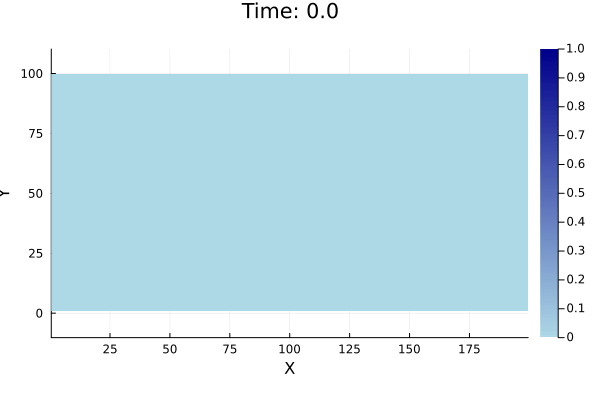

In [117]:
t_values = solution.t

animation = @animate for i in 1:length(t_values)
    u_k = solution.u[i][((Nx-1)*(Ny-1)+1):end]
    u_k1 = reshape(u_k, Nx-1, Ny-1)
    heatmap(u_k1', c=:blues, aspect_ratio=:equal, xlabel="X", ylabel="Y", title="Time: $(t_values[i])")
end

gif(animation, "animation.gif", fps = 10)
# display(animation)